# Week 7 - Performance metrics

<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Performance metrics in Classification](#section-1)
1. [Section Two: A toy model for ROC-AUC](#section-2)
1. [Section Three: Performance metrics in Regression](#section-3)
1. [Section Four: The MNIST dataset](#section-4)
1. [Section Five: Exercises](#section-5)

<hr style="border:2px solid gray">

# Section One: Performance metrics in Classification [^](#outline) <a id='section-1'></a>

So far you have seen a couple different ML algorithms for both classification and regression. We have tracked the performance of these models some simple **performance metrics**, including classification accuracy and root-mean squared error. However, these are far from the be-all and end-all of evaluating the performance of machine learning algorithms. This week we will introduce a couple important metrics to evaluate the performance of your algorithms including **ROC-AUC** for classification and **goodness of fit** for regression.

When we look at a classification problem, we have previosly looked at the percentage of test points that were correctly classified. However, we can define things in a way that gives us a bit more insight into what is actually going on. For a binary classification problem with $y_i \in \{+1, -1\}$, we can define four rates describing how good the classification is:

* **True positive (TP)**: Samples in the +1 class that are correctly identified as the +1 class
<br>

* **False positive (FP)**: Samples in the -1 class that are incorrectly identified as the +1 class
<br>

* **True negative (TN)**: Samples in the -1 class that are correctly identified as the -1 class
<br>

* **False negative (FN)**: Samples in the +1 class that are incorrectly identified as the -1 class

This tells us not only if the model prediction is accurate i.e. predicts the correct class, but how it makes mistakes. 


For example, consider the Iris dataset we have seen before. We will focus on a single type of iris, namely *iris versicolor*, and we will attempt to classify each point as to whether it is an *iris versicolor* or not. With a simple linear SVC, we can produce the following **confusion matrix**, which is a matrix of the true positive, false positive, true negative and false negative rates. Here we have evaluated the prediction on all of the Iris dataset.



<div>
<img src=Week7_plots/confusion_matrix.png align='center' width=600>
</div>

*Confusion matrix for classifying IRIS into *versicolor* and not *versicolor*. The entire 150 sample dataset is used.*


We can define derived quantities from these that express different things about the model:

* **Accuracy**: as we have seen already, this is the proportion of samples that are classified correctly
<br>

\begin{equation*}
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}
<br>

* **Fall-out or False Positive Rate**: the proportion of points with $y$ = -1 that are incorrectly predicted as $\hat{y}$ = +1
<br>

\begin{equation*}
\text{Fall-out} = \frac{\text{+1 predictions with true class -1}}{\text{Points with true class -1}} = \frac{FP}{FP + TN}
\end{equation*}
<br>

* **Precision**: the proportion of points with predicted to have class +1 that have true class +1 i.e. fraction of predictions of class +1 that are correct
<br>

\begin{equation*}
\text{Precision} = \frac{\text{+1 class predictions with true class +1}}{\text{Predictions of class +1}} = \frac{TP}{TP + FP}
\end{equation*}
<br>

* **Recall or True Positive Rate**: fraction of points with true class +1 that are correctly identified as class +1
<br>

\begin{equation*}
\text{Recall} = \frac{\text{+1 class predictions with true class +1}}{\text{Points with true class +1}} = \frac{TP}{TP + FN}
\end{equation*}

In general, there is a trade-off between **precision** and **recall**. This is not necessarily obvious, but can be seen for an example 1D case. The classifier in this case assigns the -1 class to samples with an $\mathbf{X}$ value left of the decision boundary, and the +1 class to samples with an $\mathbf{X}$ value to the right of the decision boundary.

<img src='Week7_plots/decision_boundary_1_example.png' align='center' height=200>

*Example binary classifier with one input feature. The decision boundary at this case is set at 0.05.*

In this example, the prediction of this classifier can be represented as follows:

| | Correct prediction | Incorrect prediction |
|-|-|-|
| Class +1 | 8 | 1 |
| Class -1 | 7 | 3 |

For this decision boundary, the precision is equal to 8/9 and the recall is equal to 8/11.

We can look at what these values are for a different decision boundary:

<img src='Week7_plots/decision_boundary_2_example.png' align='center' height=200>

*Example binary classifier with one input feature. The decision boundary at this case is set at 0.25.*

In this example, the prediction of this classifier can be represented as follows:

| | Correct prediction | Incorrect prediction |
|-|-|-|
| Class +1 | 7 | 0 |
| Class -1 | 8 | 4 |

For this decision boundary, the precision is equal to 1 and the recall is equal to 7/11.

While the precision has improved with the different choice of decision boundary, the recall has decreased. 

We can see the precision and recall as a function of decision boundary in the figure below:

<img src=Week7_plots/decision_boundary_precision_recall.png align='center' height=400>

*Precision and recall as a function of decision boundary for the 1D model shown prior.*

Choice of decision boundary therefore depends on whether you value precision or recall more.

* When testing for an infectious disease, it is important your test is as sensitive to the disease as possible, even if it also returns false positive results. Higher recall is preferred.
* When classifying emails as spam or not, it is important that any emails flagged as spam actually are spam; if an email is flagged as spam, it better be spam, otherwise you might miss important emails. Higher precision is preferred.

There is another metric that is very commonly used to evaluate the performance of a classifier, which we will cover next.

## The Receiver Operating Characteristic (ROC) curve

The receiver operating characteristic (ROC) curve is the plot of fallout (false positive rate) against recall (true positive rate), as a function of decision boundary value. This originated in World War II, to help radar receivers analyse the classification accuracy for discriminating signal and noise in radar detection. In general, it is used to evaluate the effectiveness of a classifier. 

* Randomly classifying samples produces a classifier where the ROC curve is a straight line with gradient 1
* The best possible classifier has a fall-out equal to 0 and a recall equal to 1
* The worst possible classifier has a fall-out equal to 1 and a recall equal to 0. 

These cases are illustrated in the figure below.





<div>
<img src=Week7_plots/roc_curve_schematic_.png align='center' width=500>
<div>

*Schematic of a receiver operator characteristic (ROC) curve. The diagonal dashed line indicates the performance of a random classifier. Better classifiers are closer to the top left of the plot, and worse classifiers are closer to the bottom right.* 

The most common way to use this curve to evaluate a given classifier is to calculate the area-under-curve (AUC). 
* This is referred to as the **AUC score**
* Complete metric for the area under the ROC curve is referred to as **ROC-AUC**

* A perfect classifier has a ROC-AUC score of 1 
* A random classifier has a ROC-AUC score of 0.5 
* The worst possible classifier has a ROC-AUC score of 0. 

We will use ROC-AUC later in this notebook to evaluate the success of classifiers.

## Summary

In this section, we have covered several performance metrics for classification, including:

* Identifying true positive, false positive, true negative and false negative counts
* Accuracy, fall-out, precision and recall
* The receiver operating characteristic (ROC) curve and the ROC-AUC score

In the following section, you will see performance metrics that we can use for regression.

<hr style="border:2px solid gray">

# Section Two: A toy model to practise ROC-AUC [^](#outline) <a id='section-2'></a>





We will now see how we can in practise look at ROC curves and calculate the ROC-AUC score. To do this, we will use a real physics dataset.

The SoLid experiment is searching for a new type of neutrino, that can only be produced by neutrino oscillations. To do this, it measures antineutrino flux from a nuclear reactor. Antineutrinos are detected via an inverse beta decay reaction:

$$\bar{\nu}_e + \text{p} \to \text{e}^+ + \text{n}$$

In this experiment, both the positron and the neutron need to be detected in order to detect this reaction. This is done with two different scintillators: one which can detect positrons that annihilate, and one that detects neutrons through a capture reaction. This results in two very different readout waveforms, which are referred to as electromagnetic signal (ES) and nuclear signal (NS) events for positrons and neutrons respectively. 

Both the positron and neutron reactions produce scintillation light. This is converted to signals as follows:

* Light is detected using photo-detectors called silicon photomultipliers, which are a form of p-n junction such that light is absorbed through the photoelectric effect and results in a current flowing across the junction
<br>

* The voltage is recorded and sampled using an analogue-to-digital converter, so the signal can be analysed. 
<br>

* Each waveform is recorded in ADC count, which is proportional to the voltage measured across the photodetector. 
<br>

* Waveforms are recorded when the measured ADC rises above a specific threshold value for a sufficient number of samples, which is referred to as the **threshold** and the **time over threshold** of the trigger.

We can characterise the waveforms by three metrics: peak value, sum value, and time over threshold. These correspond to the maximum value of the waveform, the sum of all of the waveform samples, and the number of samples the waveform is above the triggering threshold. Example ES and NS waveforms can be see in the figure below.

<img src=Week7_plots/ns_es_example.png align='center' height=300>

*NS and ES signal waveforms. In general, NS waveforms are much longer than ES waveforms.*

The data for you to use consists of 150 data points from each class, where each data point has the three input features described above. The data is provided in a .npy file, which can be loaded as follows:

In [1]:
import numpy as np

waveforms_data = np.load('nf_waveforms_dset.npy', allow_pickle = True).item()

The waveforms themselves are not included in this file, just the three descriptive features. Class label 0 corresponds to an NS waveform, and class label 1 corresponds to an ES waveform. We can print the keys of the dictionary:

In [2]:
print(waveforms_data.keys())

dict_keys(['data', 'target', 'feature_names', 'target_names'])


In [25]:
import matplotlib.pyplot as plt

waveforms_data['feature_names']

['Time over threshold', 'Peak value', 'Sum value']

This format should be familiar from the other datasets we have looked at. 

We can prepare a training dataset as we normally do from this data, to see what kind of ROC curve we can produce using a support vector classifier.

In [26]:
from sklearn.model_selection import train_test_split

X = waveforms_data['data']
y = waveforms_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

Now we define and fit two support vector classifiers, so we can compare ROC curves:

In [4]:
from sklearn.svm import SVC

svc1 = SVC(C = 1, kernel = 'rbf')
svc2 = SVC(C = 1, kernel = 'sigmoid')

svc1.fit(X_train, y_train)
svc2.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

sklearn implements a function called ```roc_curve``` that will produce the false positive rate, true positive rate, and decision thresholds corresponding to those rates from true data and the output of the model decision function. In general, an sklearn model decision function can be accessed as ```model.decision_function```. For example, to get the ROC curve for our SVC, we do the following:

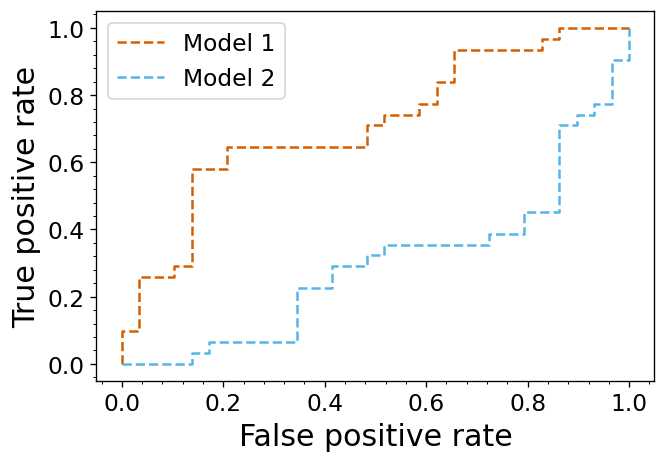

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

y_score1 = svc1.decision_function(X_test) # Calculate scores for test points
y_score2 = svc2.decision_function(X_test) # Calculate scores for test points

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1) # Find ROC curve values
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)

fig, ax = plt.subplots(1,1,figsize = (6,4), dpi = 120)

ax.plot(fpr1, tpr1,color='#D55E00', label='Model 1',ls='--') # Plot the ROC curve
ax.plot(fpr2, tpr2, color='#56B4E9', label = 'Model 2', ls = '--')
ax.set_xlabel('False positive rate',fontsize = 18)
ax.set_ylabel('True positive rate', fontsize = 18)
ax.tick_params(which='both',labelsize = 14)
ax.legend(loc='upper left',fontsize = 14)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))

Finally, we can calculate the ROC-AUC score using the ```roc_auc_score``` function in sklearn:

In [6]:
from sklearn.metrics import roc_auc_score

print('Model 1 ROC-AUC: {:.3f}'.format(roc_auc_score(y_test, y_score1)))
print('Model 2 ROC-AUC: {:.3f}'.format(roc_auc_score(y_test, y_score2)))


Model 1 ROC-AUC: 0.713
Model 2 ROC-AUC: 0.298


We can also do both of these steps in one, using sklearn's ```RocCurveDisplay.from_estimator```. This produces a nicely labelled plot and labels the curve with the ROC-AUC score.

Text(0.5, 1.0, 'Model 2')

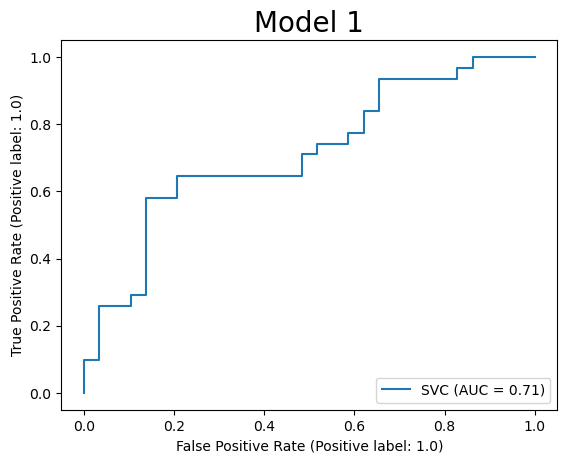

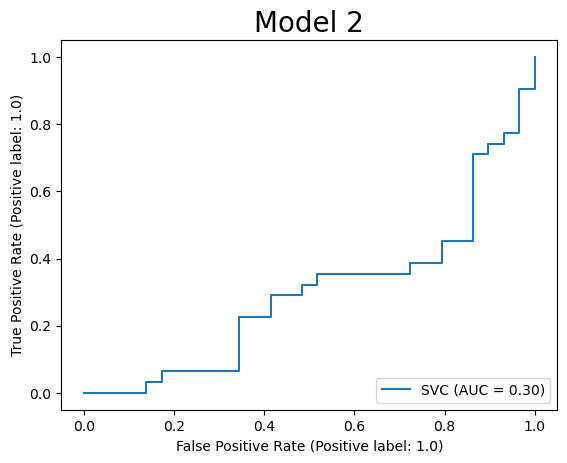

In [7]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svc1, X_test, y_test)
plt.gca().set_title('Model 1',fontsize = 20)
RocCurveDisplay.from_estimator(svc2, X_test, y_test)
plt.gca().set_title('Model 2',fontsize= 20)

<div style="background-color:#C2F5DD">

### Example

Now you have seen how to calculate ROC-AUC scores and plot a ROC curve using sklearn, try varying your hyperparameters and seeing what ROC curves and ROC-AUC scores you get. 

* Vary your hyperparameters, e.g. your kernel and your value of C
* Plot your best ROC-AUC curve

Record your results in a pandas DataFrame alongside the hyperparameters you used.

Note: we can calculate a ROC curve for a kNN classifier, but it does not implement a ```decision_function```. However, from the ```roc_curve``` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) you can see that rather than passing the output of a decision function, we can pass a list of probabilities of the positive class. From a k-NN classifier, we can obtain this using the ```predict_proba``` function. This returns an array of shape ($n_{\text{samples}}$, $n_{\text{classes}}$) where each element is the probability of the relevant class for that sample. 

We need to pass the probability of the positive class, which corresponds to the second column: ```knn.predict_proba(X_test)[:,1]```. We can then pass this to ```roc_curve``` and ```roc_auc_score``` with ```y_test``` to calculate the score. You can read more about ```predict_proba``` in the KNeighborsClassifier [documentation]((https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The ```RocCurveDisplay``` will automatically do this, so if you use that function you do not need to worry about this.

In [16]:
# Define your hyperparameters, vary these

kernel = 'linear'
C = 1

In [17]:
# Define and fit your model

svc = SVC(C = C, kernel = kernel)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [18]:
# Calculate scores for test data

y_score = svc.decision_function(X_test)

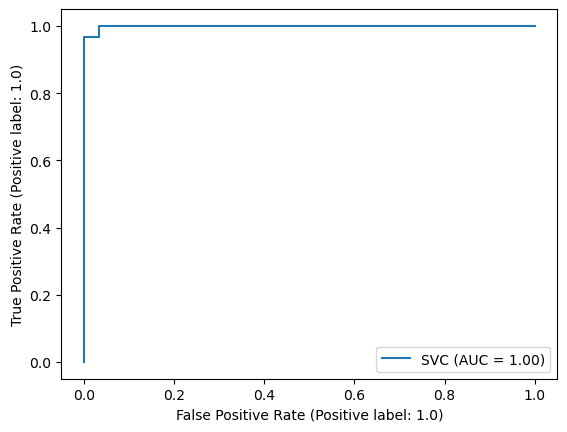

In [19]:
# Calculate ROC curve and ROC-AUC score

RocCurveDisplay.from_estimator(svc, X_test, y_test)

<div style="background-color:#C2F5DD">


Display the ROC curve for your best performing model in the cell below.

## Summary

In this section, we have discussed how to use ROC-AUC on some simple data, including:

* How to calculate true positive rate and false positive rate using `sklearn`
* How to calculate ROC-AUC scores
* How to plot ROC curves

In the next section, we will discuss performance metrics for regression.

<hr style="border:2px solid gray">

# Section Three: Performance metrics for Regression [^](#outline)<a id='section-3'></a>
 




When evaluating the regression models we have worked with so far, we have calculated the root-mean squared error. In this section, we will present some other metrics that can be used to evaluate regression models and compare them with the root-mean squared error.

## Residuals, mean absolute error and mean squared error

Many metrics for evaluating regression performance depend on the **residuals** between prediction and expected values. This is the difference between the predicted and expected values; for a regression model prediction $\hat{y}_i = f(\mathbf{X}_i)$ and a test point ($\mathbf{X}_i$, $y_i$), the residual is given as $y_i - \hat{y}_i$. The order of subtraction doesn't generally matter, as the majority of metrics are sign-independent. 

Mean absolute error, mean squared error and root-mean squared error are all dependent on the residuals. These are each defined as follows:

\begin{align*}
\text{Mean absolute error (MAE)}:\qquad\qquad & \text{MAE} = \frac{1}{N}\sum_{i = 1}^N|y_i - \hat{y}_i| \\[10pt]
\text{Mean squared error (MSE)}:\qquad\qquad & \text{MSE} = \frac{1}{N}\sum_{i = 1}^N(y_i - \hat{y}_i)^2 \\[10pt]
\text{Root-mean squared error (RMSE)}:\qquad\qquad & \text{RMSE} = \sqrt{\frac{1}{N}\sum_{i = 1}^N(y_i - \hat{y}_i)^2} \\
\end{align*}

The figure below shows residuals with some example data.

<div>
<img src='Week7_plots/residuals.png' width=700>
</div>

*Illustration of residuals. The mean absolute error, mean squared error, and root-mean squared error all depend on these values.*

Which of these is best? It depends on the specific case. There are several things to consider:

* Is the metric the same scale/units as the data? 
* Is the metric differentiable? This is important for many optimisation algorithms
* Is the metric robust against outliers?

Both MAE and RMSE have the same units as the $y$ values, while MSE does not. This makes it harder to interpret than the other metrics.

Both MSE and RMSE are differentiable, as they are expressed as continuous functions of the residuals, whereas MAE is a discontinuous function of the residuals and so is harder to differentiate. 

Because MSE and RMSE are dependent on the square of the residuals, larger errors receive a significantly heavier penalty. This is not the case for MAE; higher errors are still penalised, but not as much as for MSE and RMSE.



## Coefficient of determination $R^2$

So far, we have looked at errors that are dependent on the scale of the data; what a good value of RMSE is depends intrinsicly on how large your data values are. There are other metrics we can use to assess model performance that are independent of the model scale. 

One example of such a metric is the **coefficient of determination**, also referred to as $R^2$. This metric compares the performance of the model against a model that just predicts the mean of the training data; in other words, it tells you how much the model can explain the variance of the data. 

This is defined as:

\begin{equation*}
R^2 = 1 - \frac{\sum_{i = 1}^N(y_i - \hat{y}_i)^2}{\sum_{i = 1}^N (y_i - \bar{y})^2},
\end{equation*}

where symbols are defined as:

* $y_i$ is the target for the test point $\mathbf{X}_i$
<br>

* $\hat{y}_i$ is the model prediction for the test point $\mathbf{X}_i$
<br>

* $\bar{y}$ is the mean of the training targets

A model that predicts only the mean of the data has an $R^2$ of 0. A perfect prediction has an $R^2$ equal to 1. The value can become arbitrarily negative as model prediction can be arbitrarily bad.

<div>
<img src='Week7_plots/r2_illustration_final.png' width=600>
</div>

*Illustration of the two components to the coefficient of determination. $R^2$ tells us if our model prediction does better than predicting the mean of the data.*

## Goodness of fit

We have previously discussed goodness of fit in the context of traditional fitting, but we can apply similar concepts to evaluate the performance of ML regression models. Specifically, we can use tests such as the Kolmogorov-Smirnov test to see how similar the distribution of the real data is compared to our predictions. 

Like we talked about for Kolmogorov-Smirnov tests in Week 3, we can construct separate cumulative distribution functions for the test data and our model prediction on the test data. Then, we can calculate the Kolmogorov-Smirnov statistic to characterise how similar those two distribution functions are, which then gives us a measure of how well our model generalises from the training data to the test data. 

If we have overfitted on our training data, then the difference between these two cumulative distributions will be large and the p-value associated with the Kolmogorov-Smirnov test will be small. 

We can do this test using `kstest` from `scipy.stats`. We will demonstrate this using the polynomial data from last week. We will start by loading in the data and splitting into training and test datasets. 

In [27]:
from scipy.stats import kstest
import pandas as pd

poly_df = pd.read_hdf('poly_data.h5')

X, y = poly_df['input'].values, poly_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, train_size = 0.8, test_size = 0.2, random_state = 1)

Now we want to train two models: one that generalises well between training and test data, and one that overfits to the training data. We will do this using a polynomial kernel and an `rbf` kernel respectively.

In [28]:
from sklearn.svm import SVR

poly_model = SVR(kernel='poly',degree=4,epsilon=10,coef0=2,C=1)
rbf_model = SVR(kernel='rbf',gamma = 20, coef0=2, epsilon = 10, C = 100)

poly_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

SVR(C=100, coef0=2, epsilon=10, gamma=20)

Now that we have defined and trained our two models, we can plot the prediction of both models along with both the training and test data, to get a first impression of any overfitting.

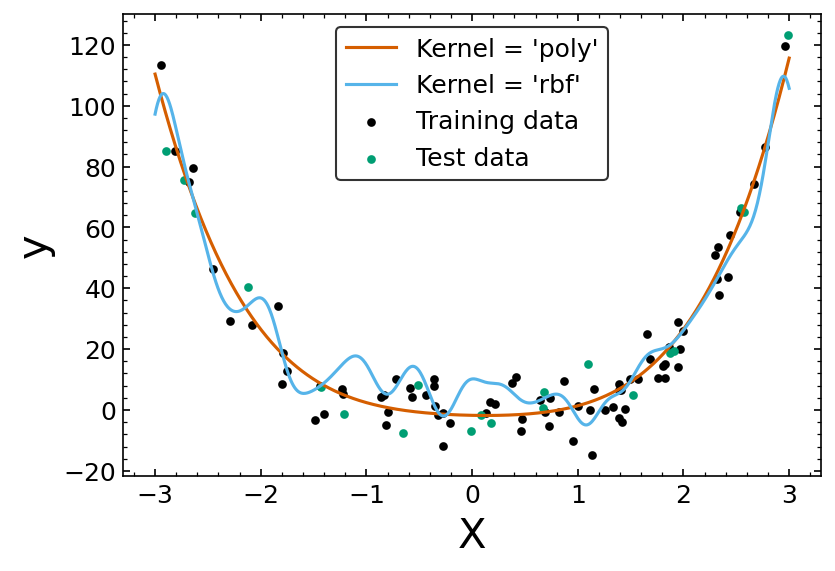

In [29]:
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)

X_plot = np.linspace(-3,3,1000).reshape(-1,1)

ax.plot(X_plot,poly_model.predict(X_plot), color='#D55E00', label = "Kernel = 'poly'")
ax.plot(X_plot, rbf_model.predict(X_plot), color='#56B4E9',label = "Kernel = 'rbf'")
ax.scatter(X_train, y_train, color='black',label='Training data', s = 10)
ax.scatter(X_test, y_test, color='#009E73',label='Test data', s = 10 )
ax.set_xlabel('X',fontsize = 20)
ax.set_ylabel('y',fontsize = 20)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.tick_params(which='both',labelsize = 12,direction='in',top=True,right=True)
ax.legend(loc='upper center',fontsize = 12, edgecolor='black')

For the `rbf` kernel, it clearly looks like we have some overfitting on the training data, given the specific shape of our prediction curve. We can now test if the empirical cumulative distribution of our model prediction is consistent with that of the test data, using `kstest`. 

In [30]:
print('poly kernel model:')
print(kstest(poly_model.predict(X_test), y_test))
print('')

print('rbf kernel model')
print(kstest(rbf_model.predict(X_test), y_test))

poly kernel model:
KstestResult(statistic=0.15, pvalue=0.9831368772656193)

rbf kernel model
KstestResult(statistic=0.35, pvalue=0.17453300569806826)


As you can see from the `kstest` results, the maximum distance between the two cumulative distributions is more than twice the size for the rbf kernel model than for the polynomial kernel model, with a corresponding p-value of 0.175 vs 0.983 for the polynomial kernel. 

In other words, these results tell us that for the rbf model, there is a 17.5% chance that the model is correctly describing the distribution of the test data, whereas there is a 98.3% chance the polynomial model is correctly describing the test data distribution. Of course, this doesn't mean we are necessarily correctly describing whatever the underlying model of the data is, only that our model correctly describes the test data distribution.

## A toy model to practise

Once again you will have an opportunity now to practise using some of the regression metrics on some toy data. We will use the random polynomial function we defined in the exercises last week.

In [31]:
poly_df = pd.read_hdf('poly_data.h5')

X, y = poly_df['input'].values, poly_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size = 0.2, random_state = 1)

Define a support vector regression model:

In [32]:
from sklearn.svm import SVR

C = 100
epsilon = 5
kernel = 'linear'

svr = SVR(C = C, epsilon = epsilon, kernel = kernel)

svr.fit(X_train, y_train)

SVR(C=100, epsilon=5, kernel='linear')

Mean absolute error, mean squared error and the coefficient of determination are all defined in sklearn. However, both mean absolute error and mean squared error are defined as negative, so by default optimising by these metrics is a maximisation rather than a minimisation, so bear that in mind.

You can also pass the argument ```squared = False``` to ```mean_squared_error``` to get the RMSE.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("Mean absolute error : {}".format(mae))
print("Mean squared error : {}".format(mse))
print("Root-mean squared error : {}".format(rmse))

r2 = r2_score(y_test, y_pred)

print("R2 score : {}".format(r2))

Mean absolute error : 28.588246817277547
Mean squared error : 1825.4586832605426
Root-mean squared error : 42.72538687081186
R2 score : -0.34754988428247624


In [34]:
from scipy.stats import kstest

In [35]:
training_residuals = svr.predict(X_train) - y_train
test_residuals = y_pred - y_test

kstest(training_residuals, test_residuals)

KstestResult(statistic=0.2125, pvalue=0.4332232072254614)

Finally, we can perform our Kolmogorov-Smirnov test:

In [21]:
# Code block for goodness of fit tests



<div style="background-color:#C2F5DD">

### Example

Now you have seen how to these metrics for regression using SVR, try varying your hyperparameters and see what values of performance metrics you get. 

* Vary your hyperparameters, e.g. your kernel and your value of C
* Record your results in a pandas DataFrame, including the hyperparameters you used.


In [36]:
# Define your hyperparameters; vary these

C = 100
epsilon = 5
kernel = 'linear'

In [37]:
# Define and fit your model

svr = SVR(C = C, epsilon = epsilon, kernel = kernel)

svr.fit(X_train, y_train)

SVR(C=100, epsilon=5, kernel='linear')

In [38]:
# Evaluate MAE, MSE, and RMSE

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("Mean absolute error : {}".format(mae))
print("Mean squared error : {}".format(mse))
print("Root-mean squared error : {}".format(rmse))


Mean absolute error : 28.588246817277547
Mean squared error : 1825.4586832605426
Root-mean squared error : 42.72538687081186


In [39]:
# Evaluate R^2 score

r2 = r2_score(y_test, y_pred)

print("R2 score : {}".format(r2))

R2 score : -0.34754988428247624


In [40]:
# K-S test

from scipy.stats import kstest

ks_result = kstest(y_test, y_pred)

In [65]:
results_df = pd.DataFrame(np.array([[kernel, svr.C, svr.epsilon, svr.degree,svr.gamma,svr.coef0,mae, mse, rmse, r2, ks_result.statistic, ks_result.pvalue]]),
                          columns=['kernel','C','epsilon','degree','gamma','coef0','MAE','MSE','RMSE','R2','KS-statistic','KS-p-value'])

<div style="background-color:#C2F5DD">


Do you see any correlation between these metrics? E.g. does "good" MSE correlate with good $R^2$ etc?

Your answer here

## Summary

In this section, we have discussed performance metrics for regression. This has included:

* Residuals
* Mean absolute error, mean squared error, and root-mean squared error
* Coefficient of determination $R^2$

In the next section, we will discuss one of the most famous datasets in machine learnint. 

<hr style="border:2px solid gray">

# Section Four: The MNIST dataset [^](#outline) <a id='section-4'></a>



For this week, we will be working with the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). This is a set of labelled images of handwritten digits from 0 to 9. Each training sample is a 28 x 28 pixel greyscale image, where each pixel value is the intensity in that pixel. Once again, this is a commonly used dataset to test classification algorithms. There is a version implemented in sklearn that is a reduced size version, made of 8 x 8 images, that you can load using the ```load_digits``` function. However, we want to use the full dataset, so we need to download it. Note: this will take a while as this is quite a large dataset.

In [77]:
from sklearn.datasets import fetch_openml
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist = fetch_openml('mnist_784')

C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


To visualise a single digit, we need to use matplotlib's ```imshow``` function:

(-0.5, 27.5, 27.5, -0.5)

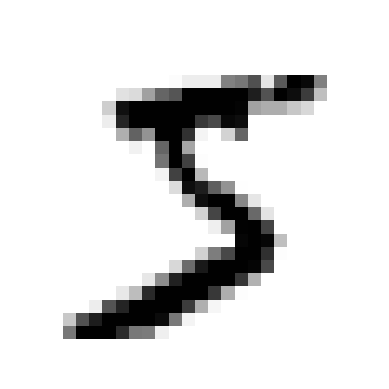

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm  as cm


image = mnist.data.values[0] # Get the first point in the dataset
image = image.reshape(28,28) # Reshape into its image form

plt.imshow(image,cmap=cm.binary)
plt.axis('off')

You can check the corresponding target for your self. You will use this dataset for the remainder of this week to practise generating ROC curves and evaluating the performance of your machine learning models.



## Summary

In this section, you have been introduced to the MNIST dataset, one of the most famous datasets for classification. 

The following section will cover the exercises for you to work through this week.

<hr style="border:2px solid gray">

# Section Five: Exercises [^](#outline) <a id='section-5'></a>



## MNIST

<div style="background-color:#C2F5DD">

### Exercise 1

Explore the MNIST dataset. This includes:

* Print the dataset description
* Visualise one of each of the classes using ```imshow```
* Visualise several training points simulataneously, e.g. in a 4 x 4 array of plots

In [99]:
# Your visualisation code here
#print(mnist.feature_names)
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


<div style="background-color:#C2F5DD">


The MNIST dataset is a multiclass classification problem. We however will restrict ourselves to binary classification; sklearn's ```SVC``` is capable of multiclass classification, which is done through a one-vs-one scheme, i.e. an independent classifier is trained for every pair of classes. For any prediction point, each classifier is used to predict that point and the class predicted by the greatest number of classifiers is chosen for the prediction point.

To construct a binary classification problem, we must pick one class we are interested in identifying, e.g. identifying a handwritten 5, and we assign that as the positive class. To do this, we must manually create a target.

<div style="background-color:#C2F5DD">

### Exercise 2

Create a target for a binary classification problem, to identify whether a digit is a 5 or not. Your target should have 0 (or -1) corresponding to an input that is **not** a 5, and 1 for inputs that are a 5. 

Make sure your target is an array of integers.

In [104]:
# Your code here
target_list=list(mnist.target)
target=np.array([1 if i=='5' else 0 for i in target_list])
X=mnist.data

## ROC-AUC for MNIST

<div style="background-color:#C2F5DD">

### Exercise 3

Using the MNIST dataset, train a linear SVM classifier to determine if a given digit is a 5 or not.  Remember the following steps:

* Divide your dataset into training and test sets
* Use ```LinearSVC``` for speed
* Define your hyperparameters
* Fit your model

Find your ROC curve and ROC-AUC score on the test data.

In [109]:
# Define training and test datasets
X_train,X_test,\
y_train,y_test = train_test_split(X,target,train_size = 0.8, test_size = 0.2,random_state=1)


In [110]:
# Define hyperparameters
from sklearn.svm import LinearSVC
C=1.0


In [111]:
# Define and fit your model
mnist_svc=LinearSVC(C=C)
mnist_svc.fit(X_train,y_train)


C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lizzi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [116]:
# Calculate prediction and scores on test data
from sklearn.metrics import accuracy_score

y_score=mnist_svc.decision_function(X_test)
FPR, TPR, TH = roc_curve(y_test,y_score)

y_pred=mnist_svc.predict(X_test)
acc=accuracy_score(y_pred,y_test)

print('Classification accuracy = {:.1f}%'.format(acc*100))

Classification accuracy = 95.5%


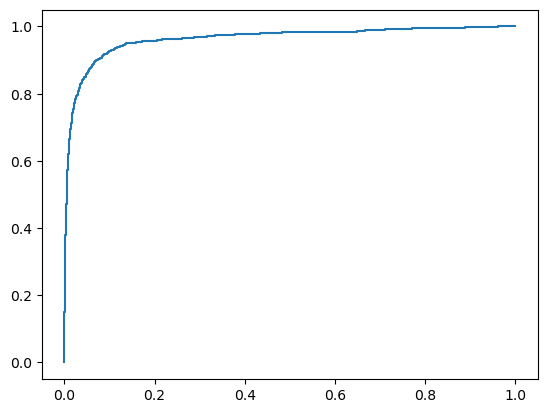

In [114]:
# Plot ROC curve
plt.plot(FPR,TPR)


In [121]:
# Calculate ROC-AUC score
auc_score=roc_auc_score(y_test,y_score)
print('ROC-AUC score = {:.5f}'.format(auc_score))

ROC-AUC score = 0.96339


<div style="background-color:#C2F5DD">


Although we have managed to use ```LinearSVC``` to train a linear SVM to classify the MNIST dataset, if we were to try using the generic ```SVC``` you will find it takes a lot longer to run. Instead of getting you to optimise hyperparameters on the whole dataset, we will instead generate a subset of MNIST with each class represented 100 times. You can then fit a model this subset and predict on the rest of the data.

In [37]:
import numpy as np

X = mnist['data'].values
target = mnist['target'].values.astype(int)

train_inds = np.concatenate([np.random.choice(np.where(target==i)[0],size = 100, replace = False) for i in range(10)])

test_inds = np.arange(len(X))[~np.isin(np.arange(len(X)),train_inds)]

y = np.zeros(len(X))
y[target==5] = 1
y = y.astype(int)

X_train, y_train = X[train_inds], y[train_inds]
X_test, y_test = X[test_inds], y[test_inds]

<div style="background-color:#C2F5DD">

### Exercise 4

Using this subset of the MNIST dataset and the sklearn ```SVC``` class, try experimenting with different hyperparameters to get the best possible ROC-AUC score you can on the full dataset. Remember the following steps:

* Vary hyperparameters such as kernel and C
* Fit your model
* Predict on the test data

Find your ROC curve and ROC-AUC score on the test data.

Remember to record the ROC-AUC score for each combination of parameters.

In [38]:
# Define your hyperparameters



In [39]:
# Fit your model



In [40]:
# Calculate your ROC-AUC score



## Performance metrics for California housing dataset

<div style="background-color:#C2F5DD">

### Exercise 5

Using the California housing dataset we saw last week, train an SVR model with your choice of hyperparameters and calculate the following metrics:

* Your choice of MAE, MSE or RMSE; which do you think is most appropriate? Discuss with the person next to you. 
* $R^2$ score
* Goodness-of-fit using Kolmogorov-Smirnov
    
Remember to use a scaler due to the different scales of the California Housing input features.

In [41]:
# Load the dataset



In [42]:
# Split into train and test datasets



In [43]:
# Define your hyper parameters



In [44]:
# Fit your model



In [45]:
# Calculate prediction and score on test data



In [46]:
# Calculate metrics
# MAE, MSE or RMSE


# Coefficient of determination


# Goodness of fit

<div style="background-color:#C2F5DD">

Do the other metrics agree with your best performing model from last week? Try testing using other hyperparameters like you did last week, do you find a model that has a better performance metrics than your model with best RMSE? 

Write a few sentences about your results.

Your answer here